Import the necessary library.

In [1]:
import scipy.ndimage as ndi
import scipy
import numpy
from PIL import Image, ImageFilter
import math
from math import pi
import matplotlib.pyplot as plt
import cv2

Define the sigma to refers to spread of gaussian.

In [2]:
sigma = 2.2

Import the image as the "img".

In [3]:
img = Image.open('../The-first-assignment-for-IPA/Lab1-Images/Lab1-Images/lena1.tif').convert('L')  # convert image to 8-bit grayscale

Using gaussian low pass filter to filter the multidimensional as a sequence of one-dimensional convolution filters. 

In [4]:
imgdata = numpy.array(img, dtype = float)                                 
G = ndi.filters.gaussian_filter(imgdata, sigma)

Create an empty image with the same size of original image. 

In [5]:
img2 = Image.new('L', img.size)
gradx = numpy.array(img2, dtype = float)                        
grady = numpy.array(img2, dtype = float)
img2_x = [[-1,0,1],[-2,0,2],[-1,0,1]]
img2_y = [[-1,-2,-1],[0,0,0],[1,2,1]]

Fetch the image length and width and save them.

In [6]:
width = img.size[1]
height = img.size[0]

Computing Gaussian and Magnitude

In [7]:
for x in range(1, width-1):
    for y in range(1, height-1):
        px = (img2_x[0][0] * G[x-1][y-1]) + (img2_x[0][1] * G[x][y-1]) + \
             (img2_x[0][2] * G[x+1][y-1]) + (img2_x[1][0] * G[x-1][y]) + \
             (img2_x[1][1] * G[x][y]) + (img2_x[1][2] * G[x+1][y]) + \
             (img2_x[2][0] * G[x-1][y+1]) + (img2_x[2][1] * G[x][y+1]) + \
             (img2_x[2][2] * G[x+1][y+1])

        py = (img2_y[0][0] * G[x-1][y-1]) + (img2_y[0][1] * G[x][y-1]) + \
             (img2_y[0][2] * G[x+1][y-1]) + (img2_y[1][0] * G[x-1][y]) + \
             (img2_y[1][1] * G[x][y]) + (img2_y[1][2] * G[x+1][y]) + \
             (img2_y[2][0] * G[x-1][y+1]) + (img2_y[2][1] * G[x][y+1]) + \
             (img2_y[2][2] * G[x+1][y+1])
        gradx[x][y] = px
        grady[x][y] = py

img2_magnitude = scipy.hypot(gradx, grady)
img2_theta = scipy.arctan2(grady, gradx)

In [8]:
img2_theta_first = img2_theta.copy()
cv2.imwrite('../The-first-assignment-for-IPA/Results/Canny_Edges_Results/Magnitude.png', img2_magnitude)
cv2.imwrite('../The-first-assignment-for-IPA/Results/Canny_Edges_Results/Gaussian_Fat.png', img2_theta)
cv2.destroyAllWindows()

Implement gaussian convolution as a sequence of horizontal and vertical convolutions.

In [9]:
for x in range(width):
    for y in range(height):
        if (img2_theta[x][y]<22.5 and img2_theta[x][y]>=0) or \
           (img2_theta[x][y]>=157.5 and img2_theta[x][y]<202.5) or \
           (img2_theta[x][y]>=337.5 and img2_theta[x][y]<=360):
            img2_theta[x][y]=0
        elif (img2_theta[x][y]>=22.5 and img2_theta[x][y]<67.5) or \
             (img2_theta[x][y]>=202.5 and img2_theta[x][y]<247.5):
            img2_theta[x][y]=45
        elif (img2_theta[x][y]>=67.5 and img2_theta[x][y]<112.5)or \
             (img2_theta[x][y]>=247.5 and img2_theta[x][y]<292.5):
            img2_theta[x][y]=90
        else:
            img2_theta[x][y]=135

In [10]:
cv2.imwrite('../The-first-assignment-for-IPA/Results/Canny_Edges_Results/Gaussian_Seq_Hor_Ver.png', img2_theta)
cv2.destroyAllWindows()

In [11]:
mag_sup = img2_magnitude.copy()

In [12]:
for x in range(1, width-1):
    for y in range(1, height-1):
        if img2_theta[x][y]==0:
            if (img2_magnitude[x][y]<=img2_magnitude[x][y+1]) or \
               (img2_magnitude[x][y]<=img2_magnitude[x][y-1]):
                mag_sup[x][y]=0
        elif img2_theta[x][y]==45:
            if (img2_magnitude[x][y]<=img2_magnitude[x-1][y+1]) or \
               (img2_magnitude[x][y]<=img2_magnitude[x+1][y-1]):
                mag_sup[x][y]=0
        elif img2_theta[x][y]==90:
            if (img2_magnitude[x][y]<=img2_magnitude[x+1][y]) or \
               (img2_magnitude[x][y]<=img2_magnitude[x-1][y]):
                mag_sup[x][y]=0
        else:
            if (img2_magnitude[x][y]<=img2_magnitude[x+1][y+1]) or \
               (img2_magnitude[x][y]<=img2_magnitude[x-1][y-1]):
                mag_sup[x][y]=0

In [13]:
cv2.imwrite('../The-first-assignment-for-IPA/Results/Canny_Edges_Results/Sub_Magnitude.png', mag_sup)
cv2.destroyAllWindows()

Low threshold used to identify weak edges and High threshold used to identify strong edges.

In [14]:
max_m = numpy.max(mag_sup)
threshold_h = 0.2*max_m
threshold_l = 0.1*max_m

Create an array of zeros with shape and type of input to produce two kind of thresholds: "Weak and Strong"

In [15]:
threshold_high = numpy.zeros((width, height))
threshold_low = numpy.zeros((width, height))
for x in range(width):
    for y in range(height):
        if mag_sup[x][y]>=threshold_h:
            threshold_high[x][y]=mag_sup[x][y]
        if mag_sup[x][y]>=threshold_l:
            threshold_low[x][y]=mag_sup[x][y]

Store the results.

In [16]:
threshold_high_first = threshold_high.copy()
threshold_low_first = threshold_low.copy()
cv2.imwrite('../The-first-assignment-for-IPA/Results/Canny_Edges_Results/Threshold_Low.png', threshold_low)
threshold_low = threshold_low - threshold_high
cv2.imwrite('../The-first-assignment-for-IPA/Results/Canny_Edges_Results/Threshold_High.png', threshold_high)
cv2.destroyAllWindows()

Make High level of Threshold efficiently.

In [17]:
def traverse(i, j):
    x = [-1, 0, 1, -1, 1, -1, 0, 1]
    y = [-1, -1, -1, 0, 0, 1, 1, 1]
    for k in range(8):
        if threshold_high[i+x[k]][j+y[k]]==0 and threshold_low[i+x[k]][j+y[k]]!=0:
            threshold_high[i+x[k]][j+y[k]]=1
            traverse(i+x[k], j+y[k])

for i in range(1, width-1):
    for j in range(1, height-1):
        if threshold_high[i][j]:
            threshold_high[i][j]=1
            traverse(i, j)

cv2.imwrite('../The-first-assignment-for-IPA/Results/Canny_Edges_Results/Threshold_high_Treavers.png', threshold_high)
cv2.destroyAllWindows()

In [18]:
titles = ['Original Image','Magnitude','Fat Gaussian','Efficient Gaussian','Weak Level of Threshold','Subtract the Weak Level of Strong Level','Strong Level of Threshold','Efficient Strong Level of Threshold',]
images = [img, img2_magnitude, img2_theta_first, img2_theta, threshold_low_first, threshold_low, threshold_high_first, threshold_high, ]

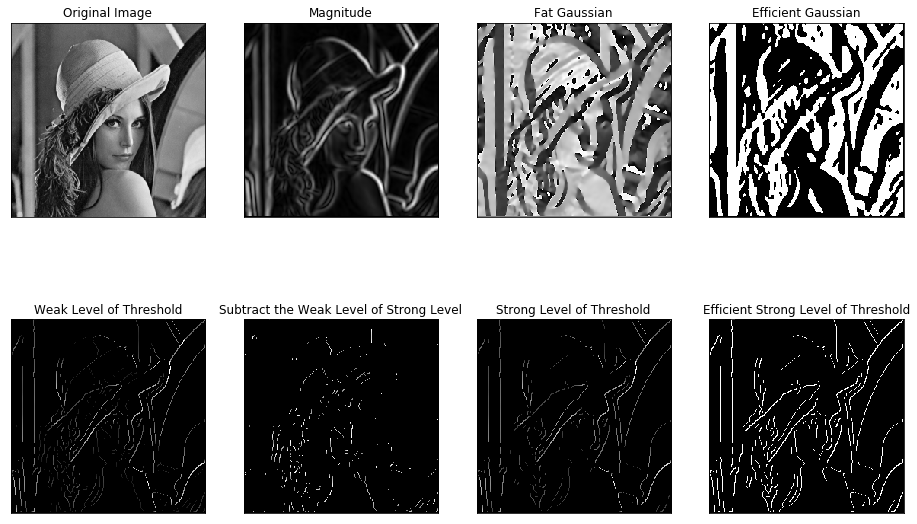

In [19]:
plt.figure(figsize=(16, 10))
for i in xrange(8):
    plt.subplot(2,4,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()